<a href="https://colab.research.google.com/github/YashDidwania125/Data_Analytics/blob/main/Titanic_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

In [8]:
df = pd.read_csv('/content/train.csv')

In [9]:
df.drop(labels=['PassengerId' ,'Name','Ticket'], axis=1 , inplace = True)

In [14]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [15]:
df.drop(labels=['Cabin'], axis=1 , inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


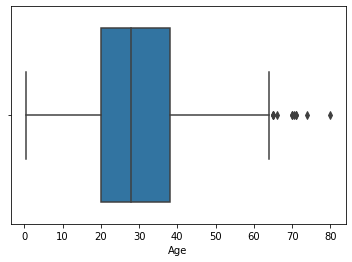

In [19]:
sns.boxplot(df["Age"])

In [23]:
df['Age'].median(skipna=True)

28.0

In [25]:
df['Age'].replace(np.nan , 28 , inplace = True )

In [28]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
df['Embarked'].fillna(value ='S' , inplace=True)

In [38]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Sex', 'Embarked'])

In [39]:
one_hot_encoded_data.drop(labels=['Sex_female','Embarked_C'],axis=1,inplace=True)

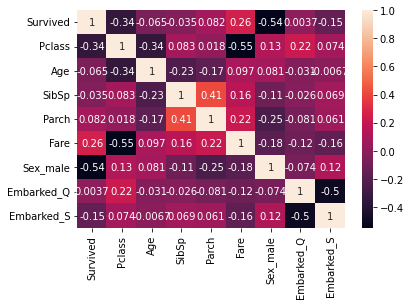

In [40]:
sns.heatmap(one_hot_encoded_data.corr() , annot=True)

In [42]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [72]:
one_hot_encoded_data.loc[:,['Age','Fare']] = preprocessing.StandardScaler().fit_transform(one_hot_encoded_data.loc[:,['Age','Fare']])
one_hot_encoded_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,-0.565736,1,0,-0.502445,1,0,1
1,1,1,0.663861,1,0,0.786845,0,0,0
2,1,3,-0.258337,0,0,-0.488854,0,0,1
3,1,1,0.433312,1,0,0.420730,0,0,1
4,0,3,0.433312,0,0,-0.486337,1,0,1


In [73]:
X_train, X_test, y_train, y_test = train_test_split(one_hot_encoded_data.iloc[:,1:], one_hot_encoded_data['Survived'], test_size=0.2, random_state=1)

In [74]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [75]:
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(X_train)

In [76]:
mask = np.where(yhat== 1)
X_train, y_train = X_train.iloc[mask[0].tolist(), :], y_train.iloc[mask[0].tolist() ]  

In [77]:
clf = LogisticRegression().fit(X_train, y_train)

In [81]:
clf.score(X_train,y_train)

0.8

In [83]:
data = pd.read_csv('/content/test.csv')

In [84]:
data1 = pd.read_csv('/content/gender_submission.csv')

In [87]:
data.drop(labels=['PassengerId' ,'Name','Ticket','Cabin'], axis=1 , inplace = True)

In [89]:
data['Age'].median(skipna=True)

27.0

In [90]:
data['Age'].fillna(27 , inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


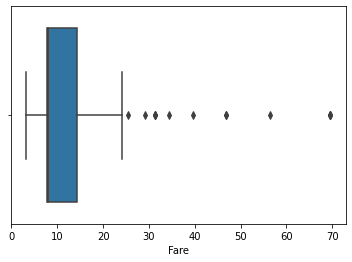

In [96]:
temp = data['Fare'][data['Pclass'] == 3]
sns.boxplot(temp)

In [97]:
temp.median(skipna=True)

7.8958

In [98]:
data['Fare'].fillna(7.8958 , inplace=True)

In [100]:
one_hot_encoded_data1 = pd.get_dummies(data, columns = ['Sex', 'Embarked'])
one_hot_encoded_data1.drop(labels=['Sex_female','Embarked_C'],axis=1,inplace=True)

In [102]:
one_hot_encoded_data1.loc[:,['Age','Fare']] = preprocessing.StandardScaler().fit_transform(one_hot_encoded_data1.loc[:,['Age','Fare']])
one_hot_encoded_data1.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,0.386231,0,0,-0.497071,1,1,0
1,3,1.371370,1,0,-0.511934,0,0,1
2,2,2.553537,0,0,-0.463762,1,1,0
3,3,-0.204852,0,0,-0.482135,1,0,1
4,3,-0.598908,1,1,-0.417159,0,0,1


In [103]:
M = clf.predict(one_hot_encoded_data1)

In [108]:
print ("Accuracy : ", accuracy_score(data1['Survived'], M))

Accuracy :  0.9210526315789473
